###Calibration and Performance Evaluation of FLIR and ICI Infrared Thermographs Against Reference Oral Temperature in a Clinical Cohort.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
flir_df = pd.read_csv('/content/FLIR_groups1and2.csv',header=2)
ici_df = pd.read_csv('/content/ICI_groups1and2.csv',header=2)

print(flir_df.head())
print(ici_df.head())


  SubjectID  Unnamed: 1  T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  \
0  161117-1         NaN       0.58      34.98      35.36        34.44   
1  161117-2         NaN       0.83      34.71      34.51        34.46   
2  161117-3         NaN       0.85      35.70      35.44        35.00   
3  161117-4         NaN       0.90      35.17      35.50        34.25   
4  161117-5         NaN       1.08      35.33      35.55        34.31   

   aveAllL13_1  T_RC1  T_RC_Dry1  T_RC_Wet1  ...  T_FHLC4  T_FHBC4  T_FHTC4  \
0        34.85  34.91      34.91      34.60  ...    33.47    33.69    33.22   
1        34.24  34.68      34.68      34.44  ...    33.70    34.14    33.90   
2        34.78  35.67      35.67      35.46  ...    34.75    34.77    35.01   
3        35.00  35.14      35.14      35.08  ...    34.63    34.14    34.61   
4        35.14  35.50      35.30      35.50  ...    34.67    34.72    35.02   

   T_FH_Max4  T_FHC_Max4  T_Max4  T_OR4  T_OR_Max4  Unnamed: 113  aveOralM  
0      34

In [4]:
flir_df = flir_df.loc[:, ~flir_df.columns.str.contains('Unnamed')]
ici_df = ici_df.loc[:, ~ici_df.columns.str.contains('Unnamed')]

In [5]:
flir_df.head()

,SubjectID,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,...,T_FHRC4,T_FHLC4,T_FHBC4,T_FHTC4,T_FH_Max4,T_FHC_Max4,T_Max4,T_OR4,T_OR_Max4,aveOralM
0,161117-1,0.58,34.98,35.36,34.44,34.85,34.91,34.91,34.60,34.98,...,33.66,33.47,33.69,33.22,34.53,34.10,36.39,36.37,36.39,36.59
1,161117-2,0.83,34.71,34.51,34.46,34.24,34.68,34.68,34.44,34.71,...,34.06,33.70,34.14,33.90,34.53,34.44,35.84,35.82,35.84,37.19
2,161117-3,0.85,35.70,35.44,35.00,34.78,35.67,35.67,35.46,35.70,...,34.77,34.75,34.77,35.01,35.40,35.23,36.40,36.37,36.40,37.34
3,161117-4,0.90,35.17,35.50,34.25,35.00,35.14,35.14,35.08,35.17,...,34.02,34.63,34.14,34.61,35.23,35.04,35.70,35.06,35.08,37.09
4,161117-5,1.08,35.33,35.55,34.31,35.14,35.50,35.30,35.50,35.52,...,35.19,34.67,34.72,35.02,35.50,35.50,36.64,36.63,36.64,37.04


In [6]:
flir_df.isnull().sum(), ici_df.isnull().sum()

(SubjectID       0
 T_offset1      17
 Max1R13_1      16
 Max1L13_1      16
 aveAllR13_1    16
                ..
 T_FHC_Max4     29
 T_Max4         29
 T_OR4          29
 T_OR_Max4      29
 aveOralM        0
 Length: 110, dtype: int64,
 SubjectID        0
 T_offset1       54
 Max1R13_1       53
 Max1L13_1       53
 aveAllR13_1     53
               ... 
 T_FHC_Max4     132
 T_Max4         132
 T_OR4          132
 T_OR_Max4      132
 aveOralM         0
 Length: 110, dtype: int64)

In [7]:
flir_features = flir_df.drop(columns=['SubjectID'])
ici_features = ici_df.drop(columns=['SubjectID'])

flir_features.fillna(flir_features.mean(), inplace=True)
ici_features.fillna(ici_features.mean(), inplace=True)

flir_target = flir_features['aveOralM']
flir_features = flir_features.drop(columns=['aveOralM'])

ici_target = ici_features['aveOralM']
ici_features = ici_features.drop(columns=['aveOralM'])

print(f"FLIR features shape: {flir_features.shape}")
print(f"ICI features shape: {ici_features.shape}")

FLIR features shape: (1020, 108)
ICI features shape: (1009, 108)


In [8]:
flir_features.head()

,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,...,T_FHCC4,T_FHRC4,T_FHLC4,T_FHBC4,T_FHTC4,T_FH_Max4,T_FHC_Max4,T_Max4,T_OR4,T_OR_Max4
0,0.58,34.98,35.36,34.44,34.85,34.91,34.91,34.60,34.98,35.31,...,33.76,33.66,33.47,33.69,33.22,34.53,34.10,36.39,36.37,36.39
1,0.83,34.71,34.51,34.46,34.24,34.68,34.68,34.44,34.71,34.65,...,34.09,34.06,33.70,34.14,33.90,34.53,34.44,35.84,35.82,35.84
2,0.85,35.70,35.44,35.00,34.78,35.67,35.67,35.46,35.70,35.41,...,34.88,34.77,34.75,34.77,35.01,35.40,35.23,36.40,36.37,36.40
3,0.90,35.17,35.50,34.25,35.00,35.14,35.14,35.08,35.17,35.50,...,34.36,34.02,34.63,34.14,34.61,35.23,35.04,35.70,35.06,35.08
4,1.08,35.33,35.55,34.31,35.14,35.50,35.30,35.50,35.52,35.53,...,35.17,35.19,34.67,34.72,35.02,35.50,35.50,36.64,36.63,36.64


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
X_train_flir, X_test_flir, y_train_flir, y_test_flir = train_test_split(flir_features, flir_target, test_size=0.2, random_state=42)

model_flir = RandomForestRegressor(n_estimators=100, random_state=42)
model_flir.fit(X_train_flir, y_train_flir)

y_pred_flir = model_flir.predict(X_test_flir)

mae_flir = mean_absolute_error(y_test_flir, y_pred_flir)
mape_flir = np.mean(np.abs((y_test_flir - y_pred_flir) / y_test_flir)) * 100
rmse_flir = np.sqrt(mean_squared_error(y_test_flir, y_pred_flir))
r2_flir = r2_score(y_test_flir, y_pred_flir)


print("FLIR Model Evaluation:")
print(f"MAE: {mae_flir}")
print(f"MAPE: {mape_flir}")
print(f"RMSE: {rmse_flir}")
print(f"R2: {r2_flir}")

FLIR Model Evaluation:
MAE: 0.17619117647058716
MAPE: 0.47535431474495904
RMSE: 0.22769804997141102
R2: 0.7537831784616806


In [11]:
X_train_ici, X_test_ici, y_train_ici, y_test_ici = train_test_split(ici_features, ici_target, test_size=0.2, random_state=42)

model_ici = RandomForestRegressor(n_estimators=100, random_state=42)
model_ici.fit(X_train_ici, y_train_ici)

y_pred_ici = model_ici.predict(X_test_ici)

mae_ici = mean_absolute_error(y_test_ici, y_pred_ici)
mape_ici = np.mean(np.abs((y_test_ici - y_pred_ici) / y_test_ici)) * 100
rmse_ici = np.sqrt(mean_squared_error(y_test_ici, y_pred_ici))
r2_ici = r2_score(y_test_ici, y_pred_ici)

print("ICI Model Evaluation:")
print(f"MAE: {mae_ici}")
print(f"MAPE: {mape_ici}")
print(f"RMSE: {rmse_ici}")
print(f"R2: {r2_ici}")


ICI Model Evaluation:
MAE: 0.18275742574257442
MAPE: 0.49333125285962126
RMSE: 0.2351167447532553
R2: 0.772091237349851


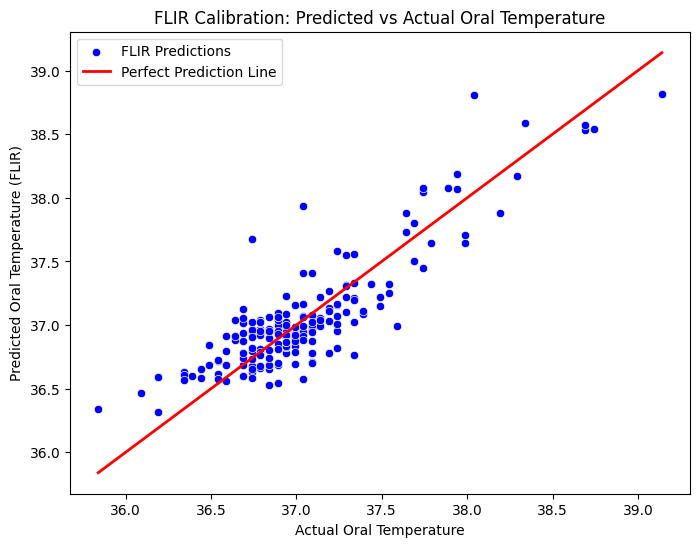

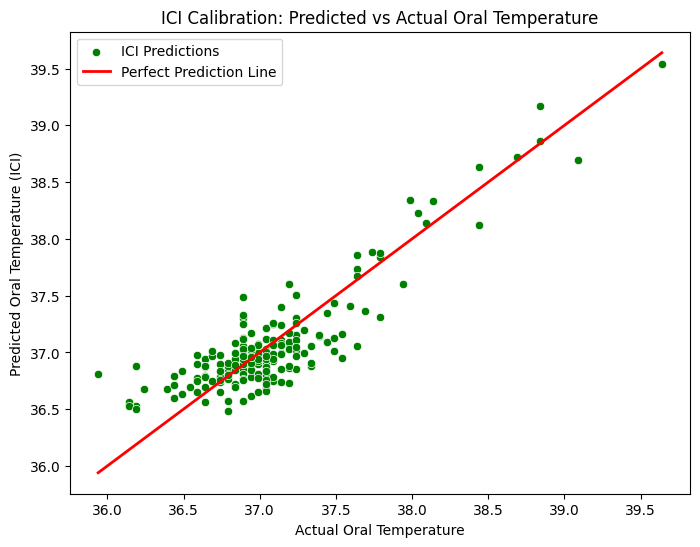

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_flir, y=y_pred_flir, color='blue', label='FLIR Predictions')
plt.plot([y_test_flir.min(), y_test_flir.max()], [y_test_flir.min(), y_test_flir.max()], color='red', linewidth=2, label="Perfect Prediction Line")
plt.xlabel("Actual Oral Temperature")
plt.ylabel("Predicted Oral Temperature (FLIR)")
plt.title("FLIR Calibration: Predicted vs Actual Oral Temperature")
plt.legend()
plt.show()

# Scatter plot of Predicted vs Actual for ICI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_ici, y=y_pred_ici, color='green', label='ICI Predictions')
plt.plot([y_test_ici.min(), y_test_ici.max()], [y_test_ici.min(), y_test_ici.max()], color='red', linewidth=2, label="Perfect Prediction Line")
plt.xlabel("Actual Oral Temperature")
plt.ylabel("Predicted Oral Temperature (ICI)")
plt.title("ICI Calibration: Predicted vs Actual Oral Temperature")
plt.legend()
plt.show()

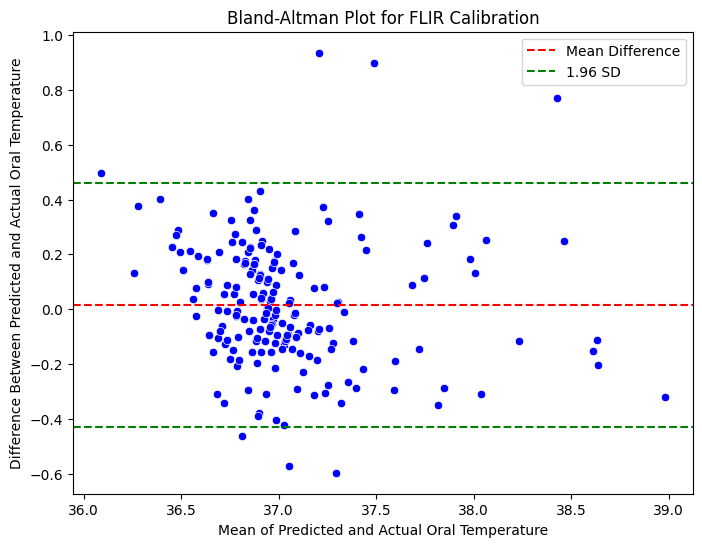

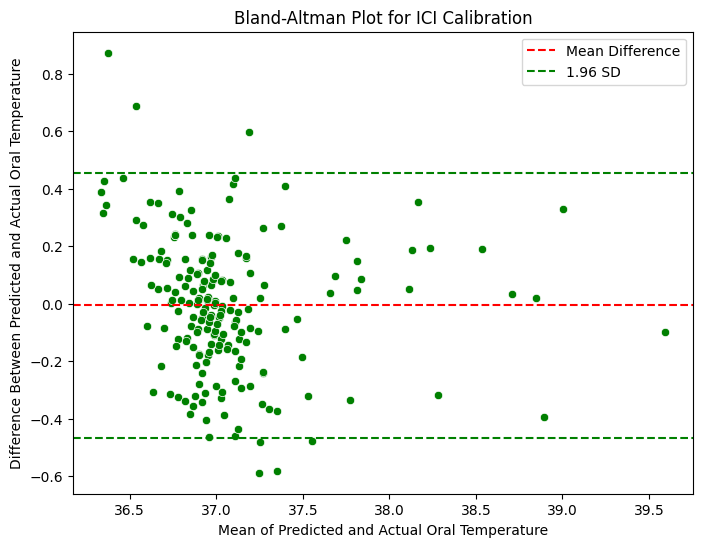

In [13]:
# Bland-Altman plot for FLIR
difference_flir = y_pred_flir - y_test_flir
mean_val_flir = np.mean([y_pred_flir, y_test_flir], axis=0)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=mean_val_flir, y=difference_flir, color='blue')
plt.axhline(np.mean(difference_flir), color='red', linestyle='--', label="Mean Difference")
plt.axhline(np.mean(difference_flir) + 1.96*np.std(difference_flir), color='green', linestyle='--', label="1.96 SD")
plt.axhline(np.mean(difference_flir) - 1.96*np.std(difference_flir), color='green', linestyle='--')
plt.xlabel("Mean of Predicted and Actual Oral Temperature")
plt.ylabel("Difference Between Predicted and Actual Oral Temperature")
plt.title("Bland-Altman Plot for FLIR Calibration")
plt.legend()
plt.show()

# Bland-Altman plot for ICI
difference_ici = y_pred_ici - y_test_ici
mean_val_ici = np.mean([y_pred_ici, y_test_ici], axis=0)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=mean_val_ici, y=difference_ici, color='green')
plt.axhline(np.mean(difference_ici), color='red', linestyle='--', label="Mean Difference")
plt.axhline(np.mean(difference_ici) + 1.96*np.std(difference_ici), color='green', linestyle='--', label="1.96 SD")
plt.axhline(np.mean(difference_ici) - 1.96*np.std(difference_ici), color='green', linestyle='--')
plt.xlabel("Mean of Predicted and Actual Oral Temperature")
plt.ylabel("Difference Between Predicted and Actual Oral Temperature")
plt.title("Bland-Altman Plot for ICI Calibration")
plt.legend()
plt.show()


/tmp/ipython-input-3131032883.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=flir_importance_df, palette="Blues_d")


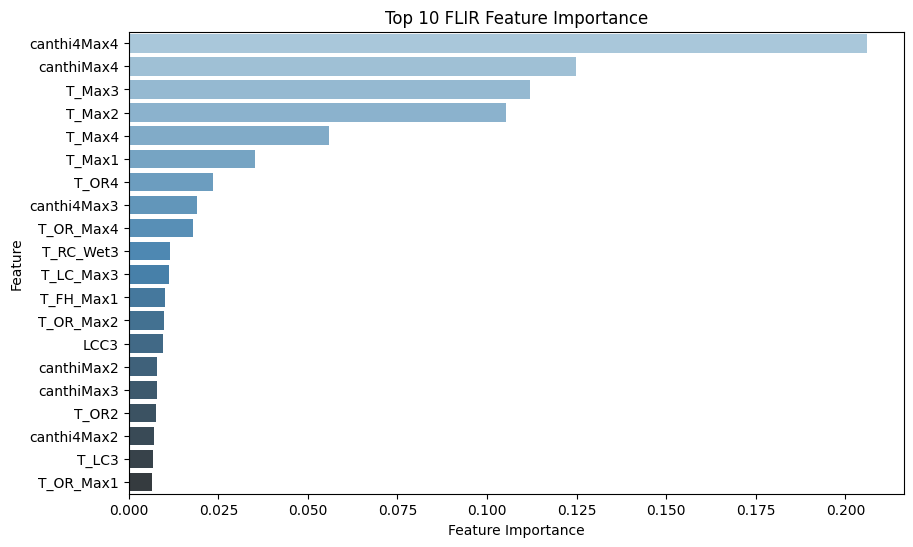

/tmp/ipython-input-3131032883.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=ici_importance_df, palette="Greens_d")


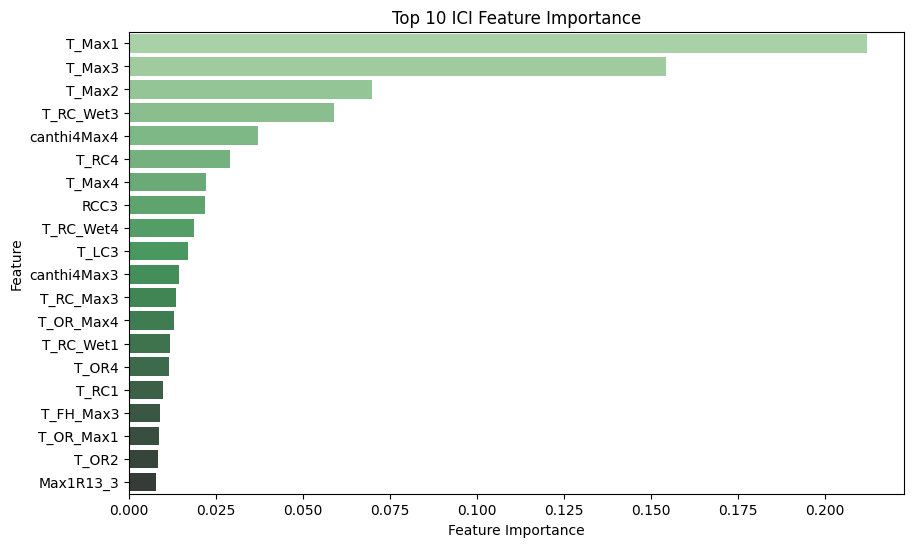

In [14]:
# Feature importance chart for FLIR
flir_importances = model_flir.feature_importances_
flir_features_names = flir_features.columns

# Create a dataframe to hold feature names and importance for easy sorting
flir_importance_df = pd.DataFrame({
    'Feature': flir_features_names,
    'Importance': flir_importances
})

# Sort by importance, top 10 features
flir_importance_df = flir_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot using seaborn with improved layout
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=flir_importance_df, palette="Blues_d")
plt.title("Top 10 FLIR Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# Feature importance chart for ICI
ici_importances = model_ici.feature_importances_
ici_features_names = ici_features.columns

# Create a dataframe to hold feature names and importance for easy sorting
ici_importance_df = pd.DataFrame({
    'Feature': ici_features_names,
    'Importance': ici_importances
})

# Sort by importance, top 10 features
ici_importance_df = ici_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot using seaborn with improved layout
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=ici_importance_df, palette="Greens_d")
plt.title("Top 10 ICI Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


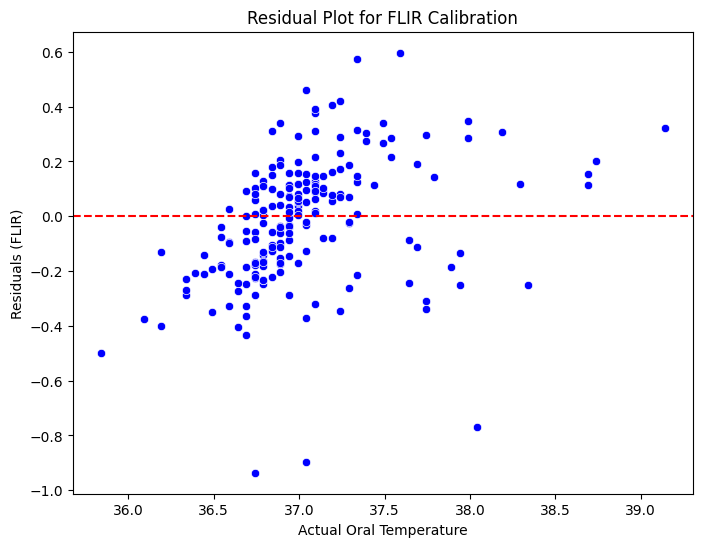

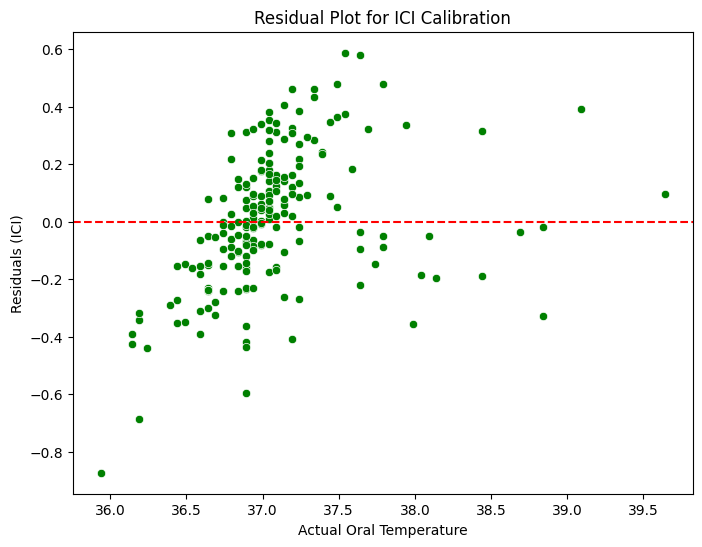

In [15]:
# Residual plot for FLIR
residuals_flir = y_test_flir - y_pred_flir

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_flir, y=residuals_flir, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Oral Temperature")
plt.ylabel("Residuals (FLIR)")
plt.title("Residual Plot for FLIR Calibration")
plt.show()

# Residual plot for ICI
residuals_ici = y_test_ici - y_pred_ici

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_ici, y=residuals_ici, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Oral Temperature")
plt.ylabel("Residuals (ICI)")
plt.title("Residual Plot for ICI Calibration")
plt.show()


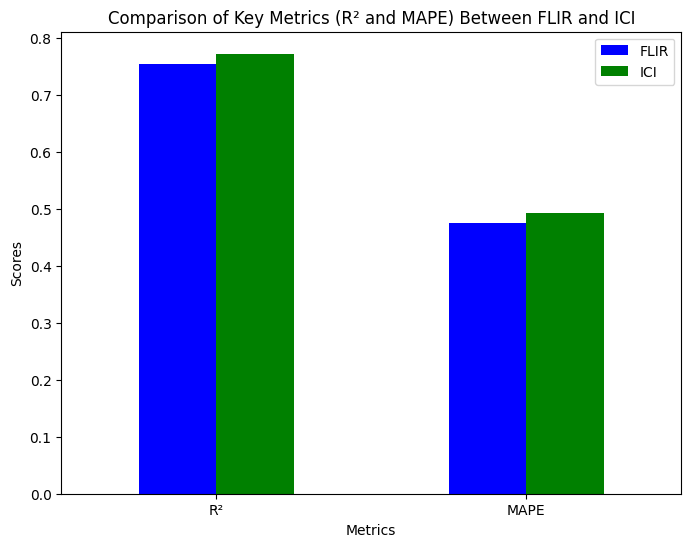

In [16]:
# Comparison of R² and MAPE metrics
metrics = ['R²', 'MAPE']
flir_metrics = [r2_flir, mape_flir]
ici_metrics = [r2_ici, mape_ici]

# Create a dataframe for the metrics comparison
metrics_df = pd.DataFrame({
    'Metric': metrics,
    'FLIR': flir_metrics,
    'ICI': ici_metrics
})

# Plot using seaborn
metrics_df.set_index('Metric').plot(kind='bar', figsize=(8, 6), color=['blue', 'green'], rot=0)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Key Metrics (R² and MAPE) Between FLIR and ICI')
plt.show()


In [17]:
if mae_flir < mae_ici:
    print("FLIR provides better accuracy for clinical fever screening.")
else:
    print("ICI provides better accuracy for clinical fever screening.")

FLIR provides better accuracy for clinical fever screening.
